<a href="https://colab.research.google.com/github/areyesca13/ML_ProjectG15/blob/main/Group15FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, auc, roc_curve
from sklearn.pipeline import Pipeline

# Data Pre-processing and Cleaning

This section prepares the data for Machine Learning tasks. Involved will be:


*   Checking for null/empty values
*   Checking for outliers
*   Table visualization of relationships



In [ ]:
data = pd.read_csv('content/climate_change_copy.csv')

data.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD,Affected_by_Climate_Change
0,2001,India,West Bengal,Corn,18.835281,881.209422,15.22,2.095915,10,14.54,10.08,14.78,47.240699,Water Management,625.900581,0
1,2024,China,North,Corn,19.996608,1170.456465,29.82,0.607228,10,11.05,33.06,23.25,30.000000,Crop Rotation,463.726469,1
2,2001,France,Ile-de-France,Wheat,27.376367,875.915581,25.75,2.512427,10,84.42,27.41,65.53,62.547896,Water Management,771.325012,0
3,2001,Canada,Prairies,Coffee,22.598486,951.309461,13.91,2.169259,10,94.06,14.38,87.58,60.848881,No Adaptation,707.342686,0
4,1998,India,Tamil Nadu,Sugarcane,18.127931,983.708590,11.81,2.248022,8,95.75,44.35,88.08,46.515098,Crop Rotation,602.910528,0


In [ ]:
missing_values = data.isnull().sum()
print(missing_values) #Check for empty/null values

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
Affected_by_Climate_Change     0
dtype: int64


In [ ]:
data.describe()


,Year,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Economic_Impact_Million_USD,Affected_by_Climate_Change
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2007.088700,20.701616,872.758830,15.246608,2.484690,8.290000,55.248332,24.955735,49.973708,56.571469,619.889434,0.07850
std,10.084245,4.634494,122.100321,8.589423,0.728798,3.068035,25.988305,14.490962,28.711027,11.040732,191.641523,0.26897
min,1990.000000,3.356123,418.547667,0.500000,0.000000,0.000000,10.010000,0.000000,0.010000,30.000000,50.000000,0.00000
25%,1999.000000,17.567474,792.565411,7.760000,2.069126,8.000000,32.677500,12.527500,25.390000,49.262848,492.511211,0.00000
50%,2007.000000,20.724262,879.249725,15.200000,2.373341,10.000000,55.175000,24.930000,49.635000,56.802332,608.836957,0.00000
75%,2016.000000,23.836226,957.902940,22.820000,2.754190,10.000000,77.582500,37.470000,74.825000,64.135261,734.177041,0.00000
max,2024.000000,35.000000,1284.397725,30.000000,4.867699,10.000000,99.990000,49.990000,99.990000,94.818612,1397.041581,1.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

# Feature Correlation


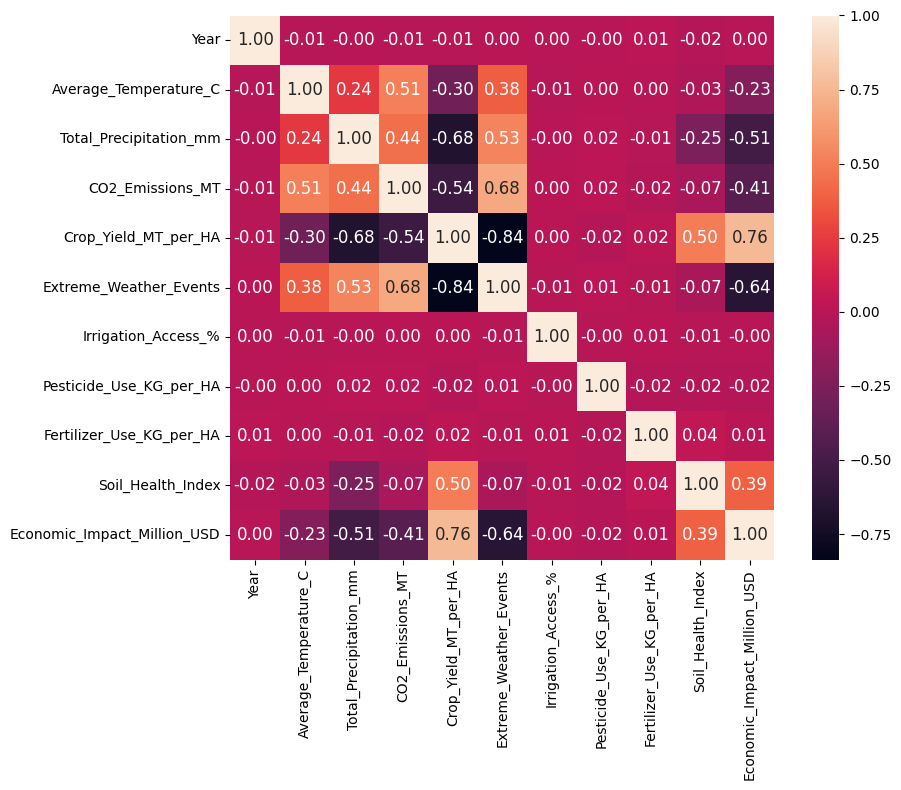

The largest magnitude correlation between 'CO2 Emissions' and 'Crop yield' is:
-0.58 for crop type 'Vegetables'
The largest magnitude correlation between 'CO2 Emissions' and 'Crop yield' is:
-0.58 for country 'Brazil'
The largest magnitude correlation between 'Average temperature' and 'Crop yield' is:
-0.34 for crop type 'Corn'
The largest magnitude correlation between 'Average temperature' and 'Crop yield' is:
-0.37 for country 'Brazil'
The largest magnitude correlation between 'Extreme Weather Events' and 'Crop yield' is:
-0.85 for crop type 'Rice'
The largest magnitude correlation between 'Extreme Weather Events' and 'Crop yield' is:
-0.85 for country 'China'
The largest magnitude correlation between 'Soil Health index' and 'Crop yield' is:
0.54 for crop type 'Barley'
The largest magnitude correlation between 'Soil Health index' and 'Crop yield' is:
0.55 for country 'Australia'
The largest magnitude correlation between 'Pesticide Use' and 'Crop yield' is:
-0.09 for crop type 'Barley

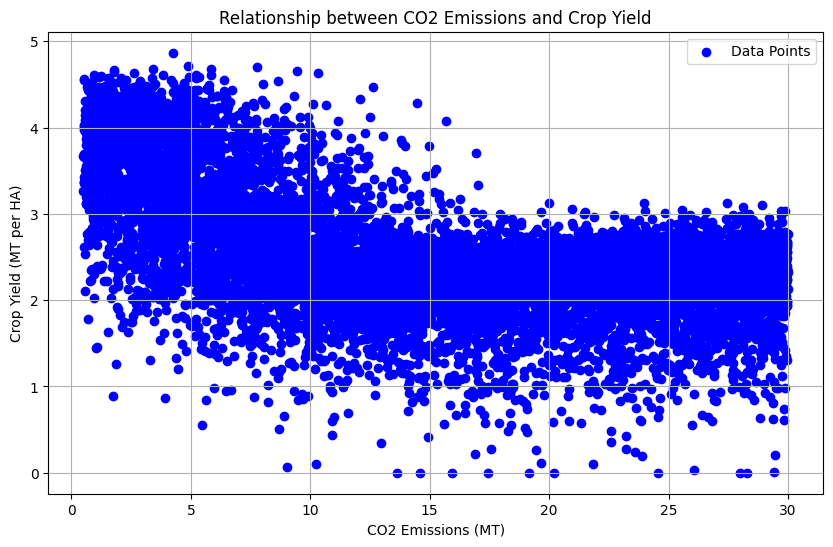

In [ ]:
#creating a heatmap of the features
heatmap_data = data.drop(columns=['Country', 'Region', 'Crop_Type', 'Adaptation_Strategies', 'Affected_by_Climate_Change'])

#group by crop type, can be accessed with group['Wheat'], ect
group= {key: group for key, group in data.groupby('Crop_Type')}

# group by region
group_country = {key: group for key, group in data.groupby('Country')}

#drop country region and adaptation strategy
columns_to_drop = ['Country', 'Region', 'Adaptation_Strategies', 'Crop_Type', 'Affected_by_Climate_Change']
group = {key: group.drop(columns=columns_to_drop) for key, group in group.items()}
group_country = {key: group.drop(columns=columns_to_drop) for key, group in group_country.items()}

standardScaler = StandardScaler()
X = standardScaler.fit_transform(heatmap_data)
heatmap_data_standardized = pd.DataFrame(X, columns=heatmap_data.columns)

cols = heatmap_data_standardized.columns.tolist()
cm = np.corrcoef(heatmap_data_standardized[cols].values.T)

plt.subplots(figsize=(10, 8))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

# #for each crop type
# for crop_type, group_df in group.items():
#     # Get the column names for the current group's DataFrame
#     cols = group_df.columns.tolist()

#     # Calculate the correlation matrix
#     cm = np.corrcoef(group_df[cols].values.T)

#     # Create the heatmap
#     plt.subplots(figsize=(10, 8))
#     hm = sns.heatmap(cm,
#                      cbar=True,
#                      annot=True,
#                      square=True,
#                      fmt='.2f',
#                      annot_kws={'size': 12},
#                      yticklabels=cols,
#                      xticklabels=cols)

#     # Add a title to differentiate the heatmaps
#     plt.title(f'Heatmap for {crop_type}', fontsize=16)

#     # Adjust layout and display
#     plt.tight_layout()
#     plt.show()

def find_max_correlation(group_dict, col_x, col_y):
    correlations = {}

    for crop_type, group_df in group_dict.items():
        # Check if both columns exist in the current group's DataFrame
        if col_x in group_df.columns and col_y in group_df.columns:
            # Calculate correlation between the two columns
            correlation = group_df[[col_x, col_y]].corr().iloc[0, 1]
            correlations[crop_type] = correlation

    # Find the crop type with the highest magnitude correlation
    if correlations:
        max_corr_crop = max(correlations, key=lambda x: abs(correlations[x]))
        return {
            "Crop Type": max_corr_crop,
            "Max Correlation": correlations[max_corr_crop]
        }
    else:
        return {
            "Error": f"No data found for columns '{col_x}' and '{col_y}' across crop types."
        }

# for crop_country, group_df in group_country.items():
#     # Get the column names for the current group's DataFrame
#     cols = group_df.columns.tolist()

#     # Calculate the correlation matrix
#     cm = np.corrcoef(group_df[cols].values.T)

#     # Create the heatmap
#     plt.subplots(figsize=(10, 8))
#     hm = sns.heatmap(cm,
#                      cbar=True,
#                      annot=True,
#                      square=True,
#                      fmt='.2f',
#                      annot_kws={'size': 12},
#                      yticklabels=cols,
#                      xticklabels=cols)

#     # Add a title to differentiate the heatmaps
#     plt.title(f'Heatmap for {crop_country}', fontsize=16)

#     # Adjust layout and display
#     plt.tight_layout()
#     plt.show()


# CO2 and Crop Yield:
# Crop type
result = find_max_correlation(group, 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA')
print(f"The largest magnitude correlation between 'CO2 Emissions' and 'Crop yield' is:")
print(f"{result['Max Correlation']:.2f} for crop type '{result['Crop Type']}'")
# Country
result = find_max_correlation(group_country, 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA')
print(f"The largest magnitude correlation between 'CO2 Emissions' and 'Crop yield' is:")
print(f"{result['Max Correlation']:.2f} for country '{result['Crop Type']}'")

# Average temperature and Crop Yield:
# Crop Type
result = find_max_correlation(group, 'Average_Temperature_C', 'Crop_Yield_MT_per_HA')
print(f"The largest magnitude correlation between 'Average temperature' and 'Crop yield' is:")
print(f"{result['Max Correlation']:.2f} for crop type '{result['Crop Type']}'")
# Country
result = find_max_correlation(group_country, 'Average_Temperature_C', 'Crop_Yield_MT_per_HA')
print(f"The largest magnitude correlation between 'Average temperature' and 'Crop yield' is:")
print(f"{result['Max Correlation']:.2f} for country '{result['Crop Type']}'")

# Extreme weather events and Crop Yield
# Crop Type
result = find_max_correlation(group, 'Extreme_Weather_Events', 'Crop_Yield_MT_per_HA')
print(f"The largest magnitude correlation between 'Extreme Weather Events' and 'Crop yield' is:")
print(f"{result['Max Correlation']:.2f} for crop type '{result['Crop Type']}'")
# Country
result = find_max_correlation(group_country, 'Extreme_Weather_Events', 'Crop_Yield_MT_per_HA')
print(f"The largest magnitude correlation between 'Extreme Weather Events' and 'Crop yield' is:")
print(f"{result['Max Correlation']:.2f} for country '{result['Crop Type']}'")

# Soil Health index and Crop Yield
# Crop Type
result = find_max_correlation(group, 'Soil_Health_Index', 'Crop_Yield_MT_per_HA')
print(f"The largest magnitude correlation between 'Soil Health index' and 'Crop yield' is:")
print(f"{result['Max Correlation']:.2f} for crop type '{result['Crop Type']}'")
# Country
result = find_max_correlation(group_country, 'Soil_Health_Index', 'Crop_Yield_MT_per_HA')
print(f"The largest magnitude correlation between 'Soil Health index' and 'Crop yield' is:")
print(f"{result['Max Correlation']:.2f} for country '{result['Crop Type']}'")

# Pesticide index and crop yeild
# Crop Type
result = find_max_correlation(group, 'Pesticide_Use_KG_per_HA', 'Crop_Yield_MT_per_HA')
print(f"The largest magnitude correlation between 'Pesticide Use' and 'Crop yield' is:")
print(f"{result['Max Correlation']:.2f} for crop type '{result['Crop Type']}'")

#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['CO2_Emissions_MT'], data['Crop_Yield_MT_per_HA'], color='blue', label='Data Points')
plt.title('Relationship between CO2 Emissions and Crop Yield')
plt.xlabel('CO2 Emissions (MT)')
plt.ylabel('Crop Yield (MT per HA)')
plt.grid(True)
plt.legend()
plt.show()

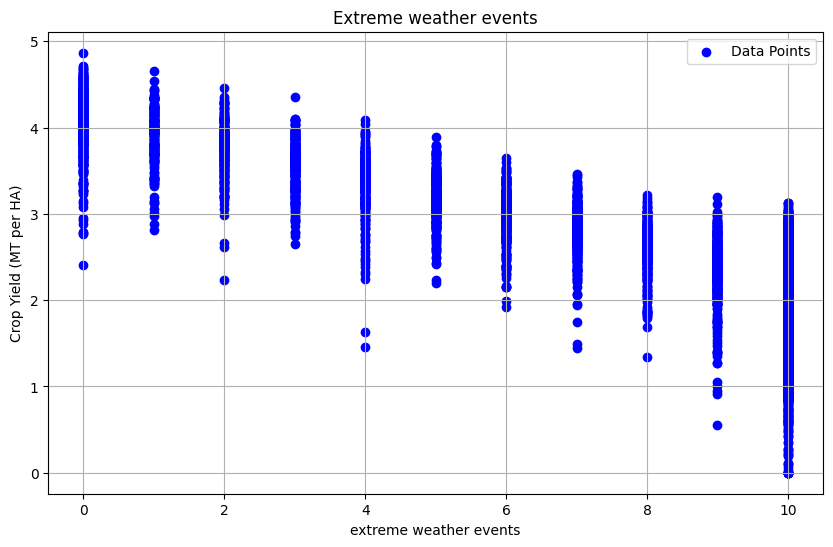

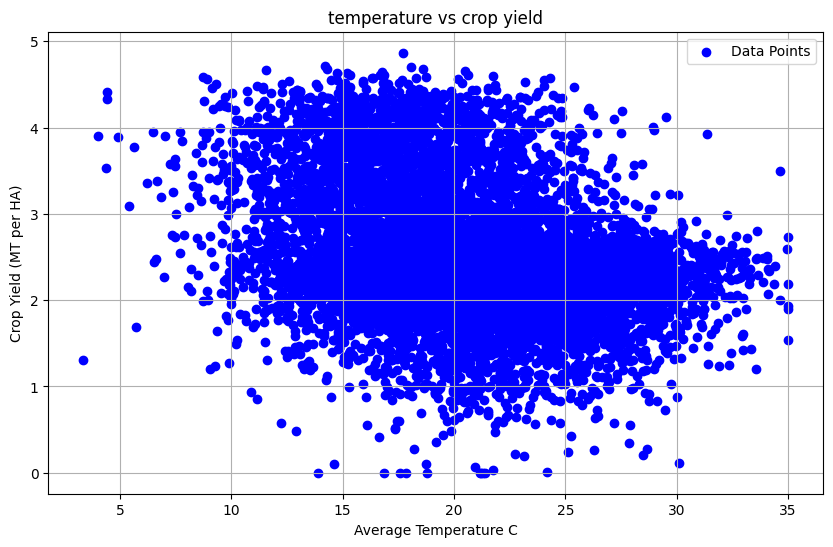

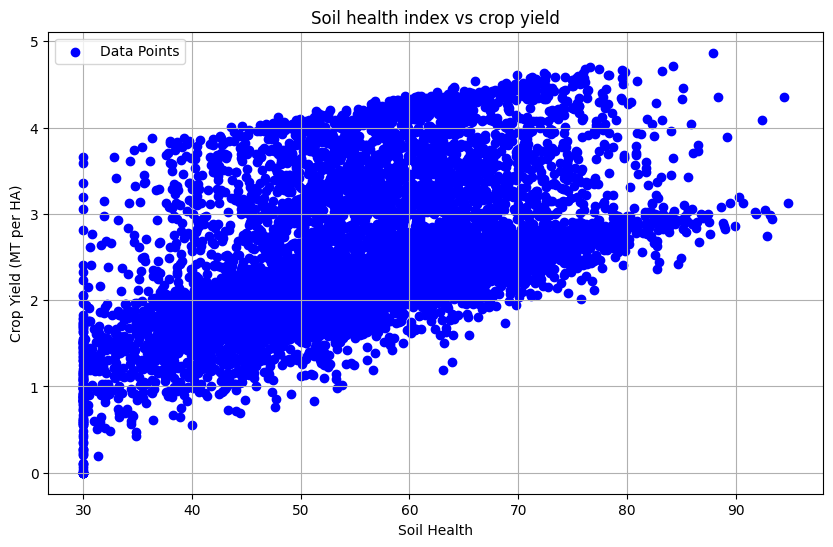

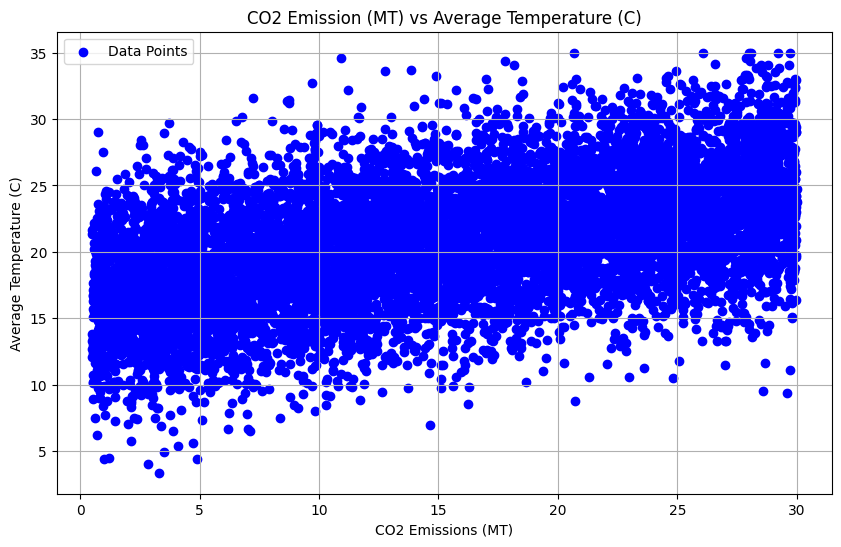

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Extreme_Weather_Events'], data['Crop_Yield_MT_per_HA'], color='blue', label='Data Points')
plt.title('Extreme weather events')
plt.xlabel('extreme weather events')
plt.ylabel('Crop Yield (MT per HA)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['Average_Temperature_C'], data['Crop_Yield_MT_per_HA'], color='blue', label='Data Points')
plt.title('temperature vs crop yield')
plt.xlabel('Average Temperature C')
plt.ylabel('Crop Yield (MT per HA)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['Soil_Health_Index'], data['Crop_Yield_MT_per_HA'], color='blue', label='Data Points')
plt.title('Soil health index vs crop yield')
plt.xlabel('Soil Health')
plt.ylabel('Crop Yield (MT per HA)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['CO2_Emissions_MT'], data['Average_Temperature_C'], color='blue', label='Data Points')
plt.title('CO2 Emission (MT) vs Average Temperature (C)')
plt.xlabel('CO2 Emissions (MT)')
plt.ylabel('Average Temperature (C)')
plt.grid(True)
plt.legend()
plt.show()

# Model 1: Trends in Climate Change - Economic Impact


In [ ]:
data_mlr = data
X = data_mlr.drop(columns=['Economic_Impact_Million_USD', 'Affected_by_Climate_Change'])
y = data_mlr['Economic_Impact_Million_USD']

X = pd.get_dummies(X, drop_first=True)
standardScaler = StandardScaler()
X = standardScaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {np.sqrt(mse_1)}")
print(f"R^2 Score: {r2_1}")

Root Mean Squared Error: 126.55827024278818
R^2 Score: 0.5854428786647624


**Below** is a more accurate model to what was discussed from the slides.

In [ ]:
data_mlr = data[['CO2_Emissions_MT', 'Extreme_Weather_Events', 'Soil_Health_Index', 'Economic_Impact_Million_USD', 'Crop_Yield_MT_per_HA']]
X = data_mlr.drop(columns=['Economic_Impact_Million_USD'])
y = data_mlr['Economic_Impact_Million_USD']

X = pd.get_dummies(X, drop_first=True)
standardScaler = StandardScaler()
X = standardScaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {np.sqrt(mse_2)}")
print(f"R^2 Score: {r2_2}")

Root Mean Squared Error: 126.23029018853805
R^2 Score: 0.5875887721891735


Below is a comparison between both of these models

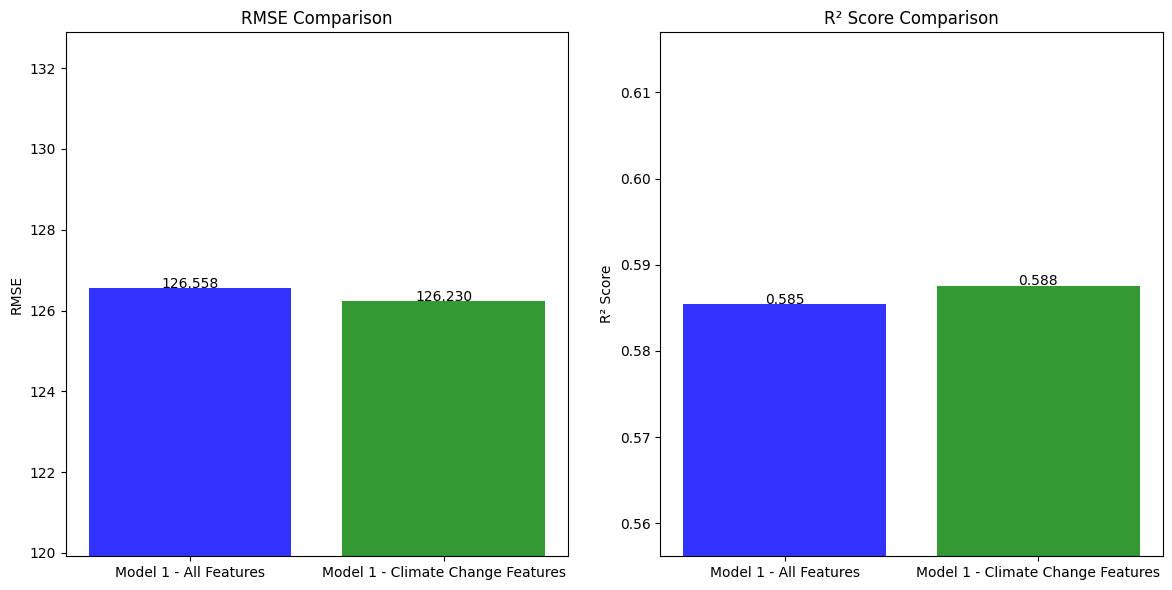

In [ ]:
models = ['Model 1 - All Features', 'Model 1 - Climate Change Features']
rmse_scores = [np.sqrt(mse_1), np.sqrt(mse_2)]
r2_scores = [r2_1, r2_2]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].bar(models, rmse_scores, color=['blue', 'green'], alpha=0.8)
ax[0].set_title('RMSE Comparison')
ax[0].set_ylabel('RMSE')
ax[0].set_ylim(min(rmse_scores) * 0.95, max(rmse_scores) * 1.05)
for i, v in enumerate(rmse_scores):
    ax[0].text(i, v + (max(rmse_scores) - min(rmse_scores)) * 0.02, f'{v:.3f}', ha='center') #This adds the actual RMSE values to the top of the bars

ax[1].bar(models, r2_scores, color=['blue', 'green'], alpha=0.8)
ax[1].set_title('R² Score Comparison')
ax[1].set_ylabel('R² Score')
ax[1].set_ylim(min(r2_scores) * 0.95, max(r2_scores) * 1.05)
for i, v in enumerate(r2_scores):
    ax[1].text(i, v + (max(r2_scores) - min(r2_scores)) * 0.02, f'{v:.3f}', ha='center') #This adds the actual R^2 scores to the top of the bars

plt.tight_layout()
plt.show()

# Model 2: Impact of Extreme Weather on Crop Yield

Using features from previous model, we will create a Linear Regression Model that predicts Crop Yield based on the following features:

* Extreme Weather Events
* Temperature
* Precipitation
* CO2 Emissions

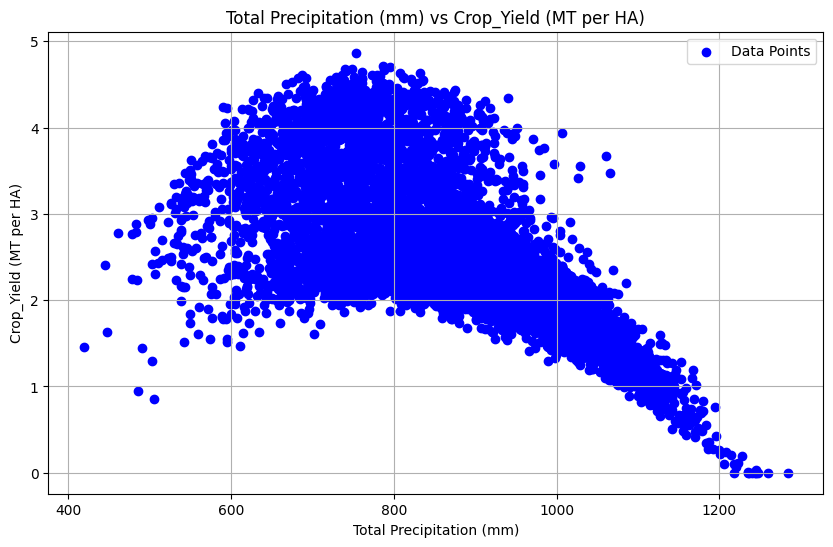

Root Mean Squared Error: 0.305491837713044
R^2 Score: 0.8250384495880545


In [ ]:
data_mlr2 = data[['Average_Temperature_C','Total_Precipitation_mm','CO2_Emissions_MT','Extreme_Weather_Events','Crop_Yield_MT_per_HA']].copy()

#Feature construction for non-linear relation precipitation quadratic
optimal_precipitation = data_mlr2['Total_Precipitation_mm'].median()
data_mlr2['Precipitation_Quadratic'] = (data_mlr2['Total_Precipitation_mm'] - optimal_precipitation) ** 2


X = data_mlr2.drop(columns=['Crop_Yield_MT_per_HA', 'Total_Precipitation_mm'])
y = data_mlr2['Crop_Yield_MT_per_HA']

X = pd.get_dummies(X, drop_first=True)
standardScaler = StandardScaler()
X = standardScaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(data['Total_Precipitation_mm'], data['Crop_Yield_MT_per_HA'], color='blue', label='Data Points')
plt.title('Total Precipitation (mm) vs Crop_Yield (MT per HA)')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Crop_Yield (MT per HA)')
plt.grid(True)
plt.legend()
plt.show()

print(f"Root Mean Squared Error: {np.sqrt(mse_2)}")
print(f"R^2 Score: {r2_2}")

#Now to compare this model with the previous one

# Model 2(cont'd): Different Crop types versus Extreme Weather

The secondary goal for Model 2 is to determine which crop types are impacted the least by extreme weather conditions in their given region/country. This will help in creating Model 3.

To do this, we can use the architecture for Model 2, and create an individual model for each crop type. We can then predict values for Crop_Yield for each model and analyze the variances of the different yields.

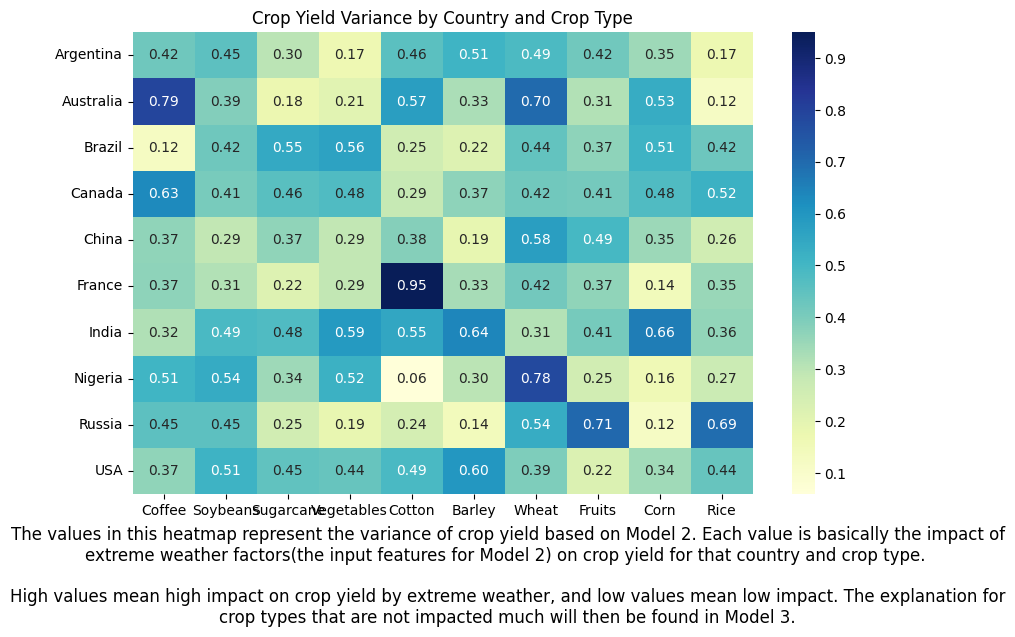

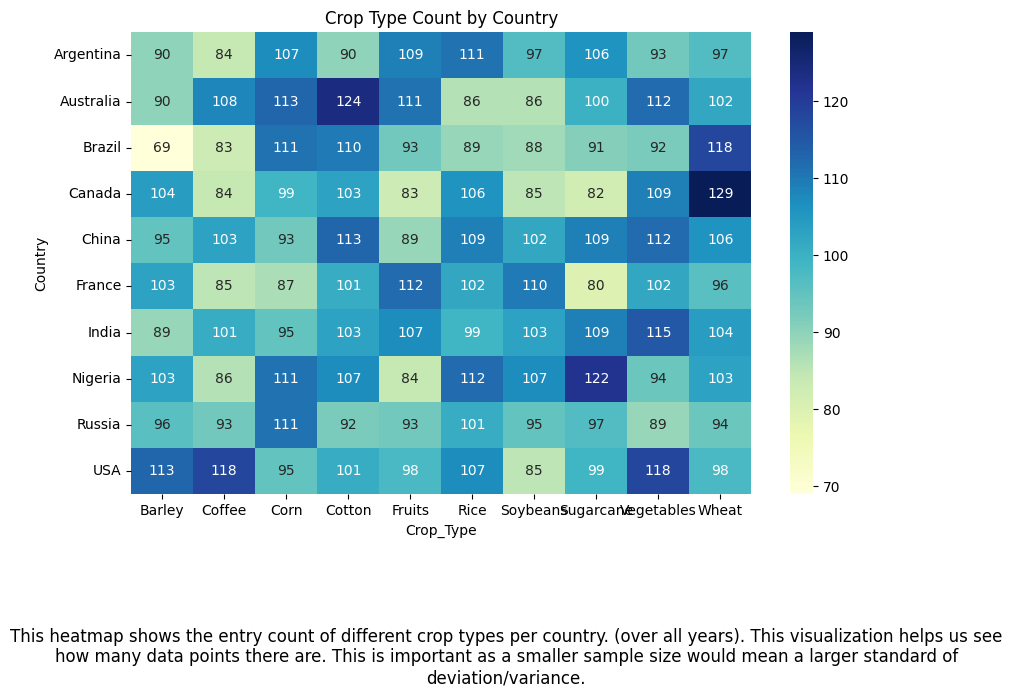

In [ ]:
from collections import defaultdict

variances_by_country = defaultdict(list)

grouped_data = data.groupby(['Crop_Type', 'Country'])

for (crop, country), group in grouped_data:
    X = group[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Extreme_Weather_Events']]
    y = group['Crop_Yield_MT_per_HA']

    standardScaler = StandardScaler()
    X_scaled = standardScaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    variance = np.var(y_pred)

    variances_by_country[country].append((crop, variance))

countries = list(variances_by_country.keys())
crops = [crop for country in variances_by_country.values() for crop, _ in country]
crops = list(set(crops))

matrix = pd.DataFrame(0.0, index=countries, columns=crops)

for country, crops_variance in variances_by_country.items():
    for crop, variance in crops_variance:
        matrix.loc[country, crop] = variance

plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=True, cmap='YlGnBu', cbar=True, fmt='.2f')
plt.title('Crop Yield Variance by Country and Crop Type')
plt.xticks(rotation=0)
plt.figtext(0.5, -0.1, 'The values in this heatmap represent the variance of crop yield based on Model 2. Each value is basically the impact of extreme weather factors(the input features for Model 2) on crop yield for that country and crop type. \n\nHigh values mean high impact on crop yield by extreme weather, and low values mean low impact. The explanation for crop types that are not impacted much will then be found in Model 3.', wrap=True, ha='center', fontsize=12)
plt.show()

crop_counts = data.groupby(['Country', 'Crop_Type']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(crop_counts, annot=True, cmap='YlGnBu', cbar=True, fmt='d')
plt.title('Crop Type Count by Country')
plt.xticks(rotation=0)
plt.figtext(
    0.5, -0.2,
    'This heatmap shows the entry count of different crop types per country. (over all years). This visualization helps us see how many data points there are. This is important as a smaller sample size would mean a larger standard of deviation/variance.',
    wrap=True, ha='center', fontsize=12
)
plt.show()

# Analysing Mitigation Strategies:

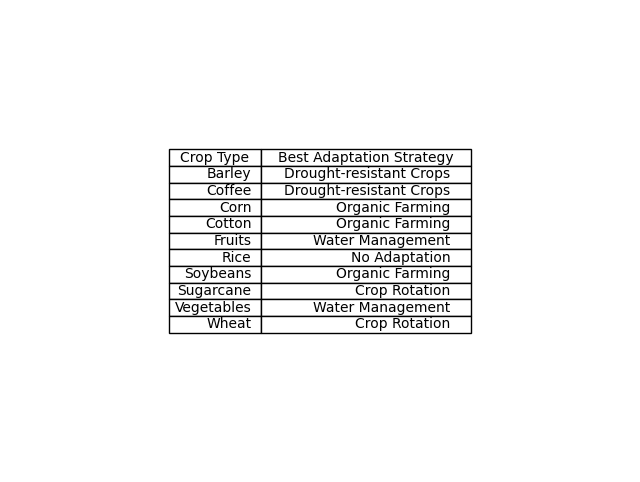

In [ ]:
data_mlr3 = data[['Crop_Yield_MT_per_HA', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Adaptation_Strategies']]

#create a grouping by crop yield and adaptation strategy
grouped_data = data.groupby(['Crop_Type', 'Adaptation_Strategies'])

#creating a new list that will hold the variance and the crop type
variance_by_strategy = defaultdict(list)

for(crop, adaptation_strategy), group in grouped_data:
  x = group[['Crop_Yield_MT_per_HA', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Adaptation_Strategies']]
  y = group['Crop_Yield_MT_per_HA']

  x = pd.get_dummies(x, drop_first=True)
  standardScaler = StandardScaler()
  x = standardScaler.fit_transform(x)

  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #fit a linear model
  model3 = LinearRegression()
  model3.fit(X_train, y_train)

  #run on the test data
  y_test_pred = model3.predict(X_test)

  mitigation_var = np.var(y_test_pred)

  variance_by_strategy[crop].append((adaptation_strategy, mitigation_var))

mitigation_startegies = list(variance_by_strategy.keys())
strategies = [strategy for crop in variance_by_strategy.values() for strategy, _ in crop]
strategies = list(set(strategies))

best_variance = 10
best_strategy = ''

data_temp = []

for crop, crops_variance in variance_by_strategy.items():
    for strategy, variance in crops_variance:
        if best_variance > variance:
            best_variance = variance
            best_strategy = strategy
    # Append the crop and its best strategy to the data list
    data_temp.append([crop, best_strategy])
    best_variance = 10
    best_strategy = ''

# Create a table
fig, ax = plt.subplots(figsize=(8, len(data_temp) * 0.6))  # Adjust height dynamically
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=data_temp, colLabels=["Crop Type", "Best Adaptation Strategy"], loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1])  # Adjust column width for all columns
plt.show()

# Analysing Mitigation Strategies: (old)

In [ ]:
# log_reg = Pipeline([
#     ('scaler', StandardScaler()),
#     ('LogReg', LogisticRegression(penalty= None, max_iter=10000))
# ])

# unique_strategy = ['Water Management', 'Crop Rotation', 'No Adaptation', 'Organic Farming', 'Drought-resistant Crops']  #, 'Drought-resistant Crops'

# X = data[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT']]
# y = data['Adaptation_Strategies']
# y = pd.get_dummies(y, drop_first=False, dtype='int')

# for strategy in unique_strategy:
#   X_train, X_test, y_train, y_test = train_test_split(X, y[strategy], test_size=0.2, random_state=42)

#   log_reg.fit(X_train, y_train)
#   y_test_pred = log_reg.predict(X_test)
#   y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
#   y_pred_class = (y_pred_proba >= 0.5).astype(int)

#   accuracy = accuracy_score(y_test, y_pred_class)
#   precision = precision_score(y_test, y_pred_class)
#   recall = recall_score(y_test, y_pred_class)

#   print("accuracy for", strategy,"", accuracy)
#   print("precision for", strategy,"", precision)
#   print("recall for", strategy,"", recall)

In [ ]:
X

,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Extreme_Weather_Events
45,13.139605,986.966839,19.10,10
355,23.562402,950.782516,11.92,10
504,18.015039,762.827700,12.24,7
560,20.908534,976.170240,25.14,10
633,21.833855,866.279047,2.28,6
...,...,...,...,...
9642,21.120580,750.231021,22.02,10
9718,24.160283,887.089932,15.25,4
9745,16.797414,836.775476,7.98,10
9860,25.831814,1026.929603,26.56,10


# Analysing Extreme Climate Change Impact: (but using logistic regression)

accuracy:  0.9555
precision:  0.7096774193548387
recall for:  0.624113475177305


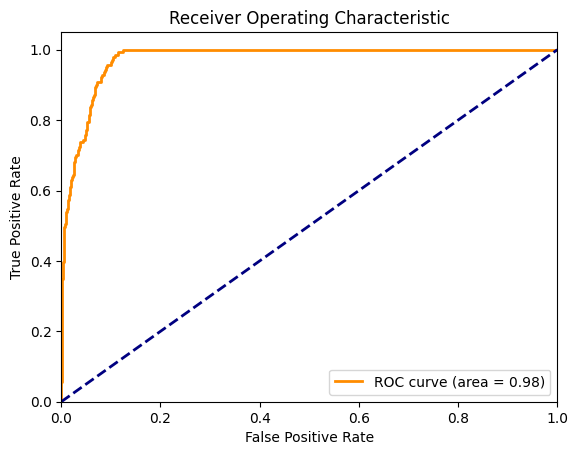

In [ ]:
log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('LogReg', LogisticRegression(penalty= None, max_iter=10000))
])



X = data[['Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'CO2_Emissions_MT']]
y = data['Affected_by_Climate_Change']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg.fit(X_train, y_train)
y_test_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
y_pred_class = (y_pred_proba >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)

print("accuracy: ", accuracy)
print("precision: ", precision)
print("recall for: ", recall)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()